# Aufgaben zum  $\chi^2$–Test

In [1]:
import CSV

using Plots
using LaTeXStrings
using Statistics

Daten einlesen

In [2]:
data = CSV.File("sample_6_7/500V_45min/divide_10.csv");

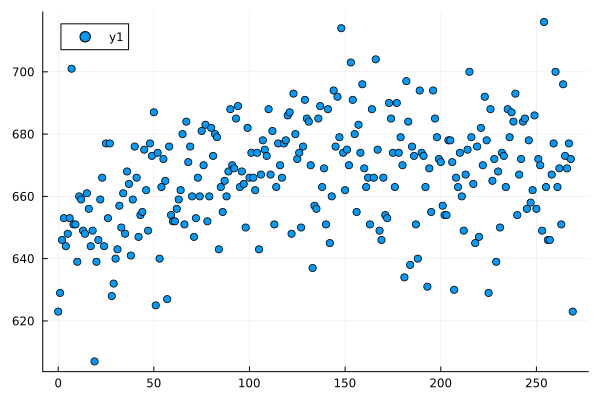

In [3]:
scatter(0:length(data), data.Zerfälle_in_10_sec)

In [4]:
x_data = 0:50
decays = data.Zerfälle_in_10_sec[x_data.+1];

avg_decays = mean(decays)

653.8039215686274

## 1. Hypothesen
Zeigen Sie zeichnerisch, was die Hypothesen a, b und c besagen.

- a: Die Präparatstärke ist konstant im betrachteten Zeitraum und gleicht dem Mittelwert der 51 Messwerte.
- b: Die Präparatstärke ist konstant im betrachteten Zeitraum und gleicht dem Mittelwert der 51 Messwerte minus 10%.
- c: Die Präparatstärke nimmt im betrachteten Zeitraum linear mit der Zeit ab (als erste Näherung eines exponentiellen Abfalls). Die Anfangszählrate ist der Mittelwert, und der Abfall von einer Messung zur anderen sei 1.

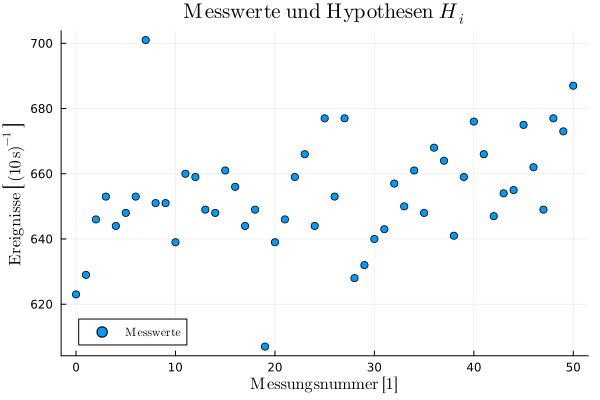

In [31]:
scatter(x_data, decays, label=L"\mathrm{Messwerte}", legend=:bottomleft)

title!(L"\mathrm{Messwerte\ und\ Hypothesen\ } H_i")
xlabel!(L"\mathrm{Messungsnummer}\ [1]")
ylabel!(L"\mathrm{Ereignisse}\ \left[(10\,\mathrm{s})^{-1}\right]")

Hypothese $H_1$: "Die Präparatstärke ist konstant im betrachteten Zeitraum und gleicht dem Mittelwert der $51$ Messwerte."

Diese Hypothese besagt, jeder erwartete Zählmenge $n_1(i)$ sei gleich dem Mittelwert der $51$ Messungen $n_i$.

$$
\begin{eqnarray}
	\bar x &=& \bar n \\
    n_1(i) &=& \frac{1}{51} \sum_{i=1}^{51} n_i \\
	\chi^2_1 &=& \sum_i \frac{(n_i-\bar n)^2}{\bar n}
\end{eqnarray}
$$

In [6]:
h1_results = fill(avg_decays, length(x_data));

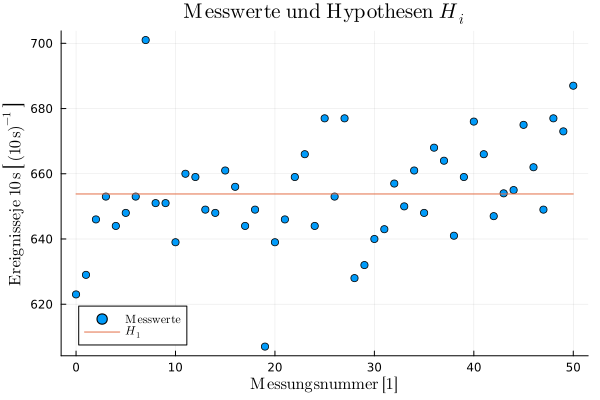

In [7]:
plot!(
    x_data,
    h1_results,
    label=L"H_1"
)

Hypothese $H_2$: "Die Präparatstärke ist konstant im betrachteten Zeitraum und gleicht dem Mittelwert der $51$ Messwerte minus $10\%$."

Dies bedeutet, dass die erwarteten Zählungen $n_2(i)$ um $10\%$ kleiner als die Zählungen nach $H_1$ sein müssen.

$$
\begin{eqnarray}
    n_2(i) &=& \frac{9}{10}\cdot n_1(i) \\
	\chi^2_2 &=& \sum_i \frac{(n_i-0.9\,\bar n)^2}{0.9\,\bar n}
\end{eqnarray}
$$

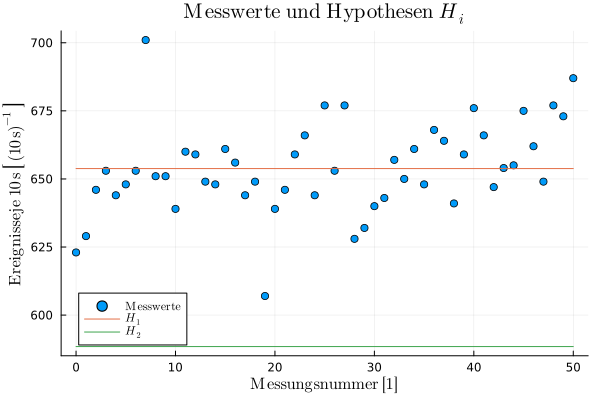

In [8]:
plot!(
    x_data,
    0.9 .* h1_results,
    label=L"H_2"
)

Hypothese $H_3$: "Die Präparatstärke nimmt im betrachteten Zeitraum linear mit der Zeit ab (als erste Näherung eines exponentiellen Abfalls). Die Anfangszählrate ist der Mittelwert, und der Abfall von einer Messung zur anderen sei $1$."

Die erwarteten Ereignisse starten demnach bei $n_1(0)$ und fallen dann linear mit einer Steigung von $1$ ab.

$$
\begin{eqnarray}
    n_3(i) &=& n_1(0) - i \\
	\chi^2_3 &=& \sum_i \frac{(n_i-(n - i))^2}{(n - i)}
\end{eqnarray}
$$

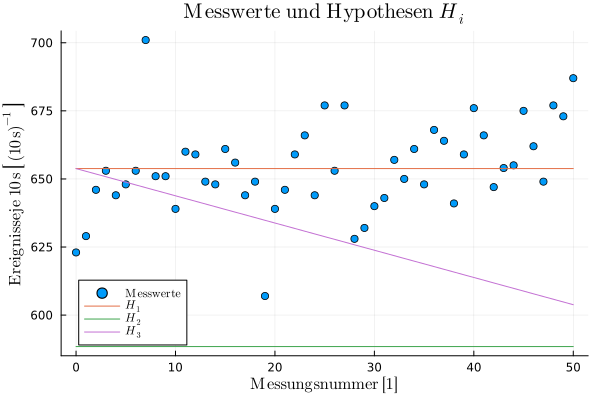

In [9]:
plot!(
    x_data,
    h1_results .- x_data,
    label=L"H_3"
)

In [10]:
savefig("../../media/B3.1/Hypothesen_plot.svg")
savefig("../../media/B3.1/Hypothesen_plot.png");

Man Erkennt, dass $H_1$ die Messwerte am besten beschreibt.

## 2. Hypothesentest
Nun werden die drei Hypothesen $H_i$ mithilfe des $\chi^2$–Tests geprüft. Hierzu werden $51$ Messwerte aus der $45\,\mathrm{min}$-Messung beider Proben gewählt, deren Zählungen über $10\,\mathrm s$ gemittelt werden. Dies wird sowohl für die nicht-totzeitkorrigierten als auch für die totzeitkorrigierten Daten durchgeführt.

Durch die Bildung des Mittelwertes gibt es noch $50$ statistische Freiheitsgrade. Dadurch können die erlaubten Grenzen für $\chi^2$ für ein System mit $50$ Freiheitsgraden und einer Signifikanz von $5\%$ verwendet werden $[6]$.

$$
\begin{eqnarray}
	\chi^2_\mathrm{min} &=& 32.357 \\
	\chi^2_\mathrm{max} &=& 71.420
\end{eqnarray}
$$

### $H_1$
$$
    \chi^2_1 = \sum_i \frac{(x_i-\bar x)^2}{\bar x}
$$

In [43]:
chi_squared_1 = sum((decays .- avg_decays).^2 ./ avg_decays)

120.56088906741647

In [21]:
(1 - chi_squared_1 / 32.357)*100

35.58046219844504

### $H_2$
$$
	\chi^2_2 = \sum_i \frac{(x_i-0.9\,\bar x)^2}{0.9\,\bar x}
$$

In [39]:
chi_squared_2 = sum((decays .- 0.9*avg_decays).^2 ./ (0.9*avg_decays))

798.1880353595658

In [27]:
chi_squared_2 / 71.420

5.511749429765232

### $H_3$
$$
	\chi^2_3 = \sum_i \frac{(x_i-(n - i))^2}{(n - i)}
$$

In [13]:
chi_squared_3 = sum((decays .- (avg_decays .- x_data)).^2 ./ (avg_decays .- x_data))

106.02106295610936

In [28]:
chi_squared_3 / 71.420

1.4844730181477088

Alle drei Hypothesen müssen verworfen werden. $\chi^2_1\approx 21$ ist etwa $36\%$ kleiner als $\chi^2_\mathrm{min}$, daher kann die Hypothese $H_1$ nicht akzeptiert werden. ~Warum?~

$\chi^2_2\approx 394$ ist um einen Faktor von ca. $5.5$ zu groß, die Hypothese $H_2$ kann damit sehr sicher abgelehnt werden. $\chi^2_3\approx 106$ ist um einen Faktor von ca. $1.5$ zu groß, sodass auch die Hypothese $H_3$ abgelehnt werden kann.

Aufgrund der Abweichungen kann nicht abschließend gesagt werden, welche Hypothese zutrifft. Allerdings ist es in der grafischen Darstellung ersichtlich, dass ein näherungsweise konstanter Wert durchaus möglich ist, was $H_1$ unterstützt.

## 3. Halbwertszeit
Welche Halbwertszeit ergibt sich aus der Hypothese c, wenn Sie einen zeitlichen Abstand der Messungen von 10 Sekunden annehmen als Näherung eines exponentiellen Zerfalls?